# General usage of the package:

In [1]:
from dhybridrpy import DHybridrpy

`dhybridrpy` easily and efficiently gives you programmatic access to your dHybridR input and output data. First, create a `DHybridrpy` object and specify your dHybridR input file and output folder.

In [2]:
input_file = "data/inputs/input"
output_folder = "data/Output"

dpy = DHybridrpy(input_file=input_file, output_folder=output_folder)

Let's print some information. For example, the simulation timesteps are

In [3]:
dpy.timesteps()

array([  1,  32,  64,  96, 128])

Variables in your input file can be accessed via the nested dictionary `inputs` (a `Namelist` object which implements all the usual `dict` functions). For example,

In [4]:
print(f"Timestep = {dpy.inputs['time']['dt']}")
print(f"Number of cells along each axis = {dpy.inputs['grid_space']['ncells']}")
print(f"Initial By = {dpy.inputs['ext_emf']['By']}")

Timestep = 0.000883883
Number of cells along each axis = [128, 64]
Initial By = 0.33


All inputs can be viewed by printing `dpy.inputs`:

In [5]:
dpy.inputs

Namelist([('node_conf', Namelist([('node_number', [1, 1])])),
          ('time',
           Namelist([('dt', 0.000883883),
                     ('niter', 128),
                     ('t0', 0.0),
                     ('stiter', 0),
                     ('c', 100.0)])),
          ('grid_space',
           Namelist([('ncells', [128, 64]),
                     ('boxsize', [64.0, 32.0]),
                     ('bdtype', ['per', 'per', 'per', 'per']),
                     ('k', 1.0),
                     ('gamma', 1.67)])),
          ('global_output',
           Namelist([('dodump', True),
                     ('ndump', 32),
                     ('b0', 3.05191e-07),
                     ('n0', 1000000.0),
                     ('units', 'NORM')])),
          ('restart',
           Namelist([('do_restart', False),
                     ('save_restart', False),
                     ('restart_step', 2500)])),
          ('ext_emf',
           Namelist([('bx', '0.6'),
                     ('by', '0.3

To see all the fields, phases, and raw files found at a given timestep, you can print `dpy.timestep(ts)` for a timestep `ts` or `dpy.timestep_index(index)` at any valid timestep array index `index`:

In [6]:
ts = 128
dpy.timestep(ts)

Fields at timestep 128:
  type = Total: Bmagnitude, Bx, By, Bz, Emagnitude, Ex, Ey, Ez, Jmagnitude, Jx, Jy, Jz
  type = External: 
  type = Self: Bmagnitude, Bx, By, Bz, Emagnitude, Ex, Ey, Ez
Phases at timestep 128:
  species = 1: Pmagnitude, Pxx, Pxy, Pyy, Pyz, Pzx, Pzz, Vmagnitude, Vx, Vy, Vz, etx1, etx2, p1x1, p1x2, p2p1, p2x1, p2x2, p3p1, p3p2, p3x1, p3x2, ptx1, ptx2, x2x1, x3x2x1
Raw files at timestep 128:

In [7]:
ts_index = -1  # The last simulation timestep
dpy.timestep_index(ts_index)

Fields at timestep 128:
  type = Total: Bmagnitude, Bx, By, Bz, Emagnitude, Ex, Ey, Ez, Jmagnitude, Jx, Jy, Jz
  type = External: 
  type = Self: Bmagnitude, Bx, By, Bz, Emagnitude, Ex, Ey, Ez
Phases at timestep 128:
  species = 1: Pmagnitude, Pxx, Pxy, Pyy, Pyz, Pzx, Pzz, Vmagnitude, Vx, Vy, Vz, etx1, etx2, p1x1, p1x2, p2p1, p2x1, p2x2, p3p1, p3p2, p3x1, p3x2, ptx1, ptx2, x2x1, x3x2x1
Raw files at timestep 128:

Fields are classified by their type: `Total`, `External`, and `Self`. Similarly, phases are classified by their particle species, which can be any integer (1,2,...) or `Total` for all species. For example, the total $B_x$ field at timestep `ts` is

In [8]:
# The kwarg `type = Total` is default, so you can equivalently call `Bx()`
Bx = dpy.timestep(ts).fields.Bx(type="Total")
print(Bx)

Field(file_path=data/Output/Fields/Magnetic/Total/x/Bfld_00000128.h5, name=Bx, timestep=128, time=0.113137024, lazy=False, type=Total)


Each field or phase has several attributes you can call to extract output data:

In [9]:
print(f"Bx data = {Bx.data}")
print(f"x grid = {Bx.xdata}")
print(f"y grid = {Bx.ydata}")
print(f"x grid limits = {Bx.xlimdata}")
print(f"y grid limits = {Bx.ylimdata}")

Bx data = [[0.5996313  0.5999745  0.6002745  ... 0.5989451  0.5990491  0.59929764]
 [0.5994859  0.59988075 0.60023814 ... 0.5987037  0.5988312  0.5991111 ]
 [0.5992841  0.59970415 0.6001078  ... 0.59853673 0.5986441  0.5989083 ]
 ...
 [0.5997611  0.5998065  0.59985757 ... 0.59973633 0.5997078  0.5997221 ]
 [0.5997402  0.59990555 0.600055   ... 0.59948117 0.599486   0.59958464]
 [0.59970987 0.5999761  0.6002081  ... 0.5992144  0.5992698  0.59945214]]
x grid = [ 0.25  0.75  1.25  1.75  2.25  2.75  3.25  3.75  4.25  4.75  5.25  5.75
  6.25  6.75  7.25  7.75  8.25  8.75  9.25  9.75 10.25 10.75 11.25 11.75
 12.25 12.75 13.25 13.75 14.25 14.75 15.25 15.75 16.25 16.75 17.25 17.75
 18.25 18.75 19.25 19.75 20.25 20.75 21.25 21.75 22.25 22.75 23.25 23.75
 24.25 24.75 25.25 25.75 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75
 30.25 30.75 31.25 31.75 32.25 32.75 33.25 33.75 34.25 34.75 35.25 35.75
 36.25 36.75 37.25 37.75 38.25 38.75 39.25 39.75 40.25 40.75 41.25 41.75
 42.25 42.75 43.25 43.75 4

We can also quickly plot data. Each field or phase has a `plot` function that accepts a variaty of arguments, allowing you to customize the plot to your liking. Simply call `plt.savefig(...)` afterward to save the figure.

(<Axes: title={'center': 'Bx at time 0.11314 $\\omega_{ci}^{-1}$ (type = Total)'}, xlabel='$x / d_i$', ylabel='$y / d_i$'>,
 <matplotlib.collections.QuadMesh at 0x7f7502ff82d0>)

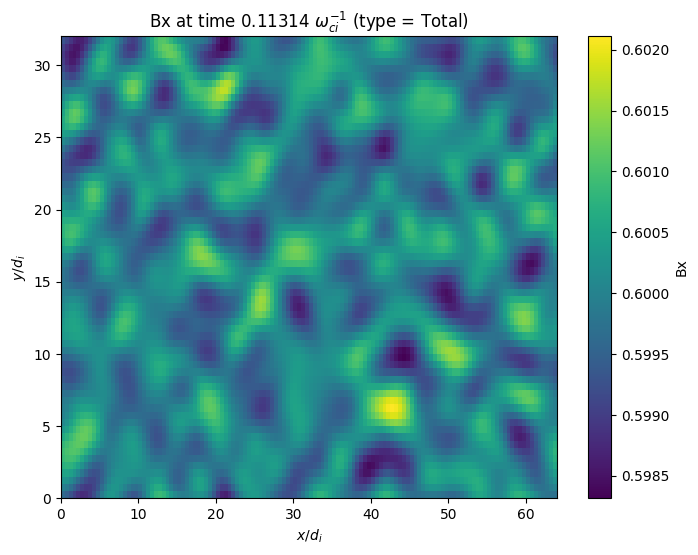

In [10]:
import matplotlib.pyplot as plt

Bx.plot()

You can simply plot a 2D FFT using the built in functions

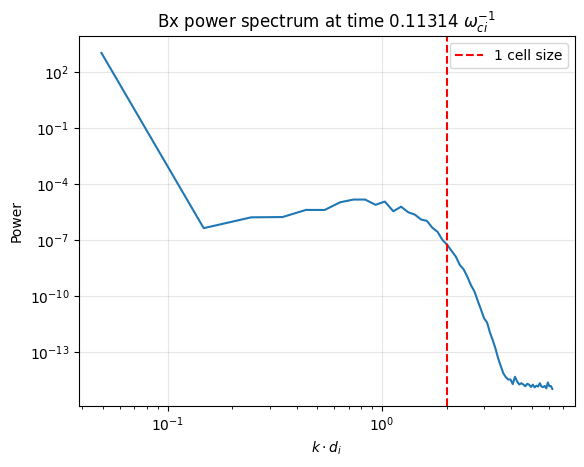

In [11]:
f, ax = plt.subplots()
Bx.plot_fft_power(ax=ax)

# add vertical lines at cell size
cells_per_di = dpy.inputs['grid_space']['ncells'][0] / dpy.inputs['grid_space']['boxsize'][0]
ax.axvline(1 * cells_per_di, color='r', linestyle='--', label='1 cell size')
ax.legend();

An analogous plot for a phase object is

(<Axes: title={'center': 'p1x1 at time 0.11314 $\\omega_{ci}^{-1}$ (species = 1)'}, xlabel='$x / d_i$', ylabel='$p_x / (m_i v_A)$'>,
 <matplotlib.collections.QuadMesh at 0x7f7500a9ded0>)

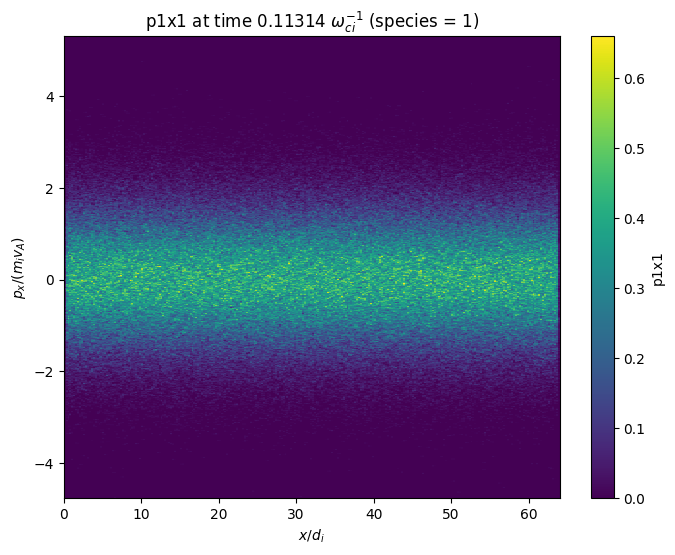

In [12]:
# The kwarg `species = 1` is default, so you can equivalently call `p1x1()`
dpy.timestep(ts).phases.p1x1(species=1).plot()

Figures with multiple plots are also straightforward to make:

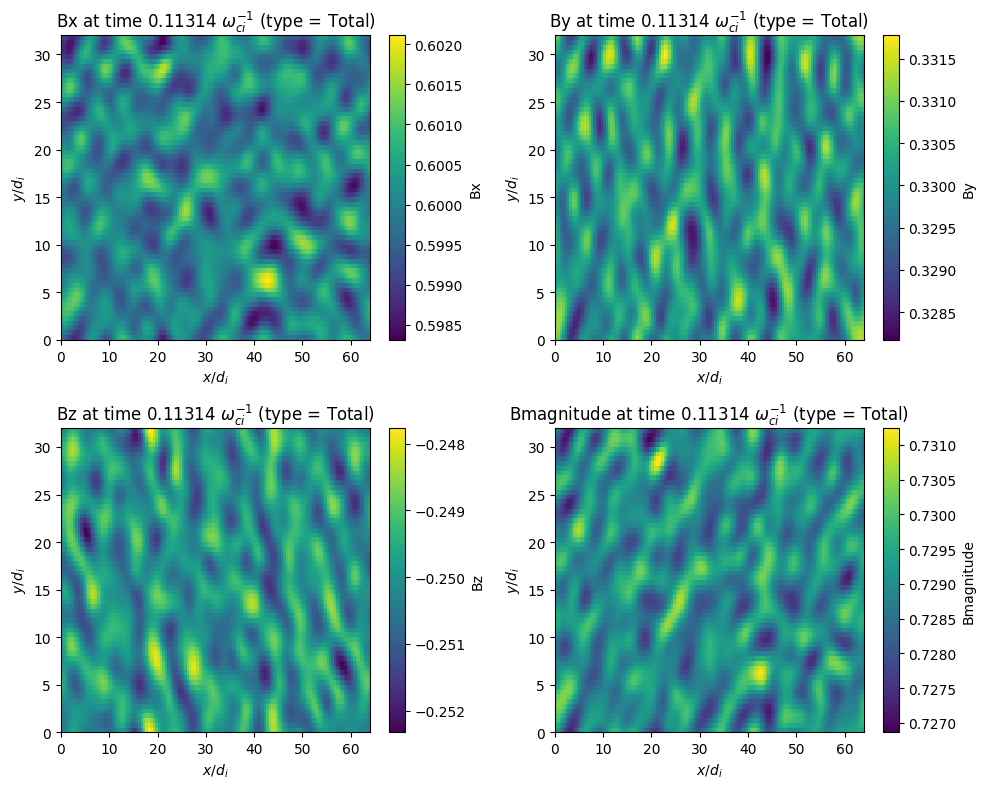

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fields = ["Bx", "By", "Bz", "Bmagnitude"]
for i, field in enumerate(fields):
    row, col = divmod(i, 2)
    getattr(dpy.timestep(ts).fields, field)().plot(ax=axs[row, col])
plt.tight_layout()

# Lazy loading of large datasets with `dask`

For extremely large output files (from large 2D or 3D simulations), eagerly loading the data may be impractical due to memory limitations or slow processing speeds. To address this, you can instantiate the `DHybridrpy` object with `lazy = True`. This leverages the `dask` library to load data lazily, performing computations only when `compute()` is explicitly called on the dask object. This allows extremely large datasets to be loaded.

In [14]:
dpy = DHybridrpy(input_file=input_file, output_folder=output_folder, lazy=True)
dpy.timestep_index(-1)

Fields at timestep 128:
  type = Total: Bmagnitude, Bx, By, Bz, Emagnitude, Ex, Ey, Ez, Jmagnitude, Jx, Jy, Jz
  type = External: 
  type = Self: Bmagnitude, Bx, By, Bz, Emagnitude, Ex, Ey, Ez
Phases at timestep 128:
  species = 1: Pmagnitude, Pxx, Pxy, Pyy, Pyz, Pzx, Pzz, Vmagnitude, Vx, Vy, Vz, etx1, etx2, p1x1, p1x2, p2p1, p2x1, p2x2, p3p1, p3p2, p3x1, p3x2, ptx1, ptx2, x2x1, x3x2x1
Raw files at timestep 128:

In [15]:
p2x1 = dpy.timestep(ts).phases.p2x1()

print(f"p2x1 = {p2x1}")
print(f"p2x1 data = {p2x1.data}")

p2x1 = Phase(file_path=data/Output/Phase/p2x1/Sp01/dens_sp01_00000128.h5, name=p2x1, timestep=128, time=0.113137024, lazy=True, species=1)
p2x1 data = dask.array<from-value, shape=(256, 512), dtype=float32, chunksize=(256, 512), chunktype=numpy.ndarray>


In [16]:
print(f"p2x1 data = {p2x1.data.compute()}")

p2x1 data = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(<Axes: title={'center': 'p2x1 at time 0.11314 $\\omega_{ci}^{-1}$ (species = 1)'}, xlabel='$x / d_i$', ylabel='$p_y / (m_i v_A)$'>,
 <matplotlib.collections.QuadMesh at 0x7f74faed5fd0>)

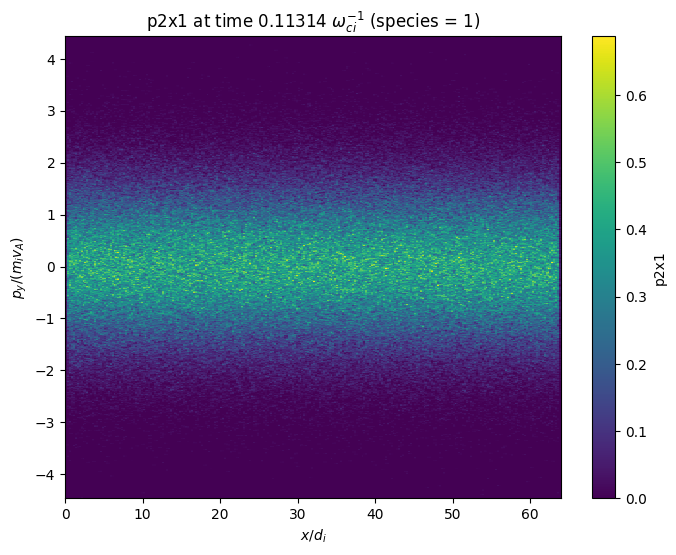

In [17]:
p2x1.plot()

In [18]:
dpy = DHybridrpy(input_file=input_file, output_folder=output_folder, lazy=False)
dpy.tracks()

array(['0-2', '0-3', '0-4', '0-10', '0-11', '0-12', '0-16', '0-22',
       '0-23', '0-24', '0-25', '0-26', '0-27', '0-28', '0-30', '0-31',
       '0-33', '0-35', '0-36', '0-39', '0-41', '0-42', '0-43', '0-44',
       '0-45', '0-47', '0-48', '0-49', '0-50', '0-51', '0-52', '0-53',
       '0-55', '0-57', '0-58', '0-61', '0-62', '0-63', '0-64', '0-65',
       '0-66', '0-68', '0-70', '0-71', '0-74', '0-75', '0-76', '0-78',
       '0-80', '0-82', '0-83', '0-84', '0-85', '0-86', '0-87', '0-88',
       '0-89', '0-90', '0-91', '0-92', '0-94', '0-95', '0-96', '0-97',
       '0-98', '0-99', '0-100', '0-101', '0-102', '0-103', '0-105',
       '0-106', '0-107', '0-111', '0-112', '0-114', '0-115', '0-116',
       '0-117', '0-118', '0-119', '0-120', '0-121', '0-122', '0-124',
       '0-127', '0-128', '0-130', '0-131', '0-133', '0-134', '0-135',
       '0-137', '0-138', '0-139', '0-140', '0-141', '0-143', '0-145',
       '0-147', '0-151', '0-152', '0-154', '0-157', '0-158', '0-159',
       '0-160', '

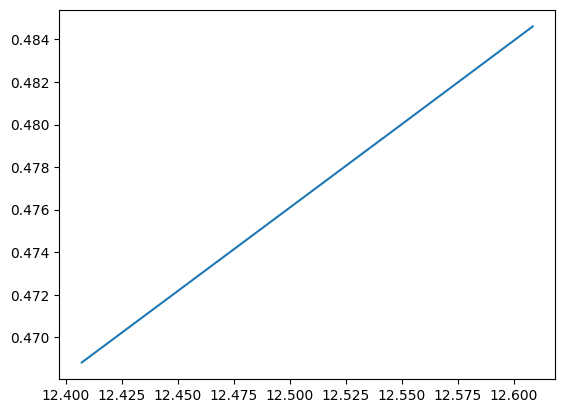

In [19]:
track = dpy.tracks()[-1]

x1 = dpy.track(track, species=1).x1
x2 = dpy.track(track, species=1).x2

plt.plot(x1, x2)